In [35]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
df_train = pd.read_csv('input/train.csv')
df_test  = pd.read_csv('input/test.csv')

In [4]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,2f54191058312878,kristen yawn is the hottes girl i have ever me...
freq,1,1


In [11]:
df_train.groupby('toxic').describe()

identity_hate                                                 insult  \
              count      mean       std  min  25%  50%  75%  max     count   
toxic                                                                        
0          144277.0  0.000714  0.026710  0.0  0.0  0.0  0.0  1.0  144277.0   
1           15294.0  0.085131  0.279086  0.0  0.0  0.0  0.0  1.0   15294.0   

                ...  severe_toxic         threat                           \
           mean ...           75%  max     count      mean       std  min   
toxic           ...                                                         
0      0.003694 ...           0.0  0.0  144277.0  0.000201  0.014176  0.0   
1      0.480188 ...           0.0  1.0   15294.0  0.029358  0.168813  0.0   

                           
       25%  50%  75%  max  
toxic                      
0      0.0  0.0  0.0  1.0  
1      0.0  0.0  0.0  1.0  

[2 rows x 40 columns]

In [12]:
df_train.groupby('severe_toxic').describe()

identity_hate                                               \
                     count      mean       std  min  25%  50%  75%  max   
severe_toxic                                                              
0                 157976.0  0.006912  0.082854  0.0  0.0  0.0  0.0  1.0   
1                   1595.0  0.196238  0.397275  0.0  0.0  0.0  0.0  1.0   

                insult           ...  threat          toxic            \
                 count      mean ...     75%  max     count      mean   
severe_toxic                     ...                                    
0             157976.0  0.041183 ...     0.0  1.0  157976.0  0.086716   
1               1595.0  0.859561 ...     0.0  1.0    1595.0  1.000000   

                                                 
                   std  min  25%  50%  75%  max  
severe_toxic                                     
0             0.281419  0.0  0.0  0.0  0.0  1.0  
1             0.000000  1.0  1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

In [13]:
df_train.groupby('obscene').describe()

identity_hate                                                 insult  \
                count      mean       std  min  25%  50%  75%  max     count   
obscene                                                                        
0            151122.0  0.002468  0.049620  0.0  0.0  0.0  0.0  1.0  151122.0   
1              8449.0  0.122145  0.327472  0.0  0.0  0.0  0.0  1.0    8449.0   

                  ...  threat          toxic                                \
             mean ...     75%  max     count      mean       std  min  25%   
obscene           ...                                                        
0        0.011395 ...     0.0  1.0  151122.0  0.048755  0.215357  0.0  0.0   
1        0.728489 ...     0.0  1.0    8449.0  0.938099  0.240990  0.0  1.0   

                        
         50%  75%  max  
obscene                 
0        0.0  0.0  1.0  
1        1.0  1.0  1.0  

[2 rows x 40 columns]

In [14]:
df_train.groupby('threat').describe()

identity_hate                                                 insult  \
               count      mean       std  min  25%  50%  75%  max     count   
threat                                                                        
0           159093.0  0.008215  0.090266  0.0  0.0  0.0  0.0  1.0  159093.0   
1              478.0  0.205021  0.404140  0.0  0.0  0.0  0.0  1.0     478.0   

                 ...  severe_toxic          toxic                           \
            mean ...           75%  max     count      mean       std  min   
threat           ...                                                         
0       0.047582 ...           0.0  1.0  159093.0  0.093310  0.290868  0.0   
1       0.642259 ...           0.0  1.0     478.0  0.939331  0.238973  0.0   

                            
        25%  50%  75%  max  
threat                      
0       0.0  0.0  0.0  1.0  
1       1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

In [15]:
df_train.groupby('insult').describe()

identity_hate                                                obscene  \
               count      mean       std  min  25%  50%  75%  max     count   
insult                                                                        
0           151694.0  0.001615  0.040156  0.0  0.0  0.0  0.0  1.0  151694.0   
1             7877.0  0.147264  0.354392  0.0  0.0  0.0  0.0  1.0    7877.0   

                 ...  threat          toxic                                \
            mean ...     75%  max     count      mean       std  min  25%   
insult           ...                                                        
0       0.015123 ...     0.0  1.0  151694.0  0.052408  0.222849  0.0  0.0   
1       0.781389 ...     0.0  1.0    7877.0  0.932335  0.251187  0.0  1.0   

                       
        50%  75%  max  
insult                 
0       0.0  0.0  1.0  
1       1.0  1.0  1.0  

[2 rows x 40 columns]

In [16]:
df_train.groupby('identity_hate').describe()

insult                                               \
                  count      mean       std  min  25%  50%  75%  max   
identity_hate                                                          
0              158166.0  0.042468  0.201655  0.0  0.0  0.0  0.0  1.0   
1                1405.0  0.825623  0.379569  0.0  1.0  1.0  1.0  1.0   

                obscene           ...  threat          toxic            \
                  count      mean ...     75%  max     count      mean   
identity_hate                     ...                                    
0              158166.0  0.046894 ...     0.0  1.0  158166.0  0.088464   
1                1405.0  0.734520 ...     0.0  1.0    1405.0  0.926690   

                                                  
                    std  min  25%  50%  75%  max  
identity_hate                                     
0              0.283969  0.0  0.0  0.0  0.0  1.0  
1              0.260737  0.0  1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

In [19]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [18]:
df_train['length'] = df_train['comment_text'].apply(len)

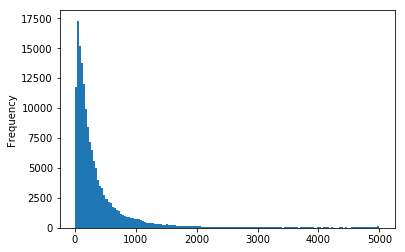

In [24]:
df_train['length'].plot.hist(bins = 150)

In [22]:
df_test['length'] = df_test['comment_text'].apply(len)

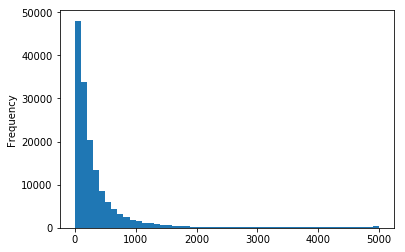

In [23]:
df_test['length'].plot.hist(bins = 50)

In [25]:
df_train['length'].describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: length, dtype: float64

In [26]:
df_test['length'].describe()

count    153164.000000
mean        364.875121
std         592.492099
min           1.000000
25%          79.000000
50%         180.000000
75%         392.000000
max        5000.000000
Name: length, dtype: float64

In [29]:
df_train[df_train['length'] == 5000].iloc[0]

id                                                0b2055f13934a41e
comment_text     ii CAN STILL POST WITH THIS COMPUTER...I SAID ...
toxic                                                            1
severe_toxic                                                     0
obscene                                                          1
threat                                                           0
insult                                                           1
identity_hate                                                    0
length                                                        5000
Name: 4174, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f597f3154e0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f597f10b5c0>], dtype=object)

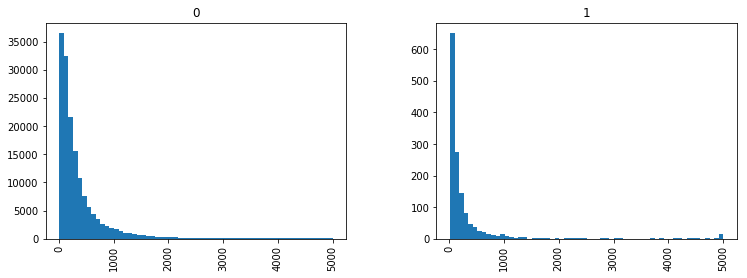

In [34]:
df_train.hist(column = 'length', by = 'identity_hate', bins = 60, figsize = (12,4))

In [40]:
import string
from nltk.corpus import stopwords

In [38]:
def text_process(message):
    """
    1. remove punctuations
    2. remove stopwords
    3. return clean text words
    """
    nopunc = [char for char in message if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
#Clean train text data
df_train['comment_text'] = df_train['comment_text'].apply(text_process)